In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [3]:
df = pd.read_csv("df_war.csv", engine='python')
df_war = df.drop("Unnamed: 0", axis=1)

## 전처리
1. 포지션 데이터 원핫인코딩
2. war 칼럼 마지막 순서로 빼기


In [5]:
df_war_ohe = pd.get_dummies(df_war, columns=['position'])

In [6]:
cols = df_war_ohe.columns.tolist()
cols = cols[:3] + cols[4:] + [cols[3]]
df_war_ohe = df_war_ohe[cols]

df_war_ohe.head()


,year,player_name,team,p_a,a_b,run,total_hit,hit1,hit2,hit3,homerun,rbi,bb,s_o,position_1B,position_2B,position_3B,position_C,position_CF,position_DH,position_LF,position_RF,position_SS,war
0,2019,양의지,NC,459,390,61,138,92,26,0,20,68,48,43,0,0,0,1,0,0,0,0,0,6.69
1,2019,페르난데스,두산,645,572,87,197,148,34,0,15,88,61,54,0,0,0,0,0,1,0,0,0,5.10
2,2019,박민우,NC,526,468,89,161,129,23,8,1,45,41,40,0,1,0,0,0,0,0,0,0,4.72
3,2019,이정후,키움,630,574,91,193,146,31,10,6,68,45,40,0,0,0,0,0,0,1,0,0,4.88
4,2019,강백호,KT,505,438,72,147,104,29,1,13,65,61,87,0,0,0,0,0,0,0,1,0,4.74


In [10]:
X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)



In [11]:
X_df.shape

(671, 21)

In [14]:
from sklearn.preprocessing import StandardScaler

X_df_scaled = StandardScaler().fit_transform(X_df)

In [21]:
X_df_scaled.shape

(671, 21)

In [33]:
y_df['war']

,year,war
0,2019,6.69
1,2019,5.10
2,2019,4.72
3,2019,4.88
4,2019,4.74
...,...,...
666,2002,1.93
667,2002,2.00
668,2002,2.01
669,2002,2.64


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X_df_scaled)
kbo_pca = pca.transform(X_df_scaled)
print(kbo_pca.shape)


(671, 10)


In [23]:
kbo_pca

array([[-1.05206771, -0.46483628, -1.78777187, ..., -0.2096819 ,
         0.48623437,  1.51074557],
       [ 4.82538796,  1.19088258,  0.55021064, ..., -1.44438593,
         5.09844655,  1.00227526],
       [ 1.22940004,  4.28618427, -0.46730989, ..., -1.62722276,
        -0.37066886,  0.20346768],
       ...,
       [-3.09444186, -0.59230673, -0.65826315, ...,  2.24990034,
         1.10079965, -0.47445923],
       [-1.25999343, -2.98085712,  1.46309033, ...,  0.95360835,
        -1.98745578,  0.01515883],
       [-2.64382882, -0.91462873,  1.36779871, ..., -0.20869356,
        -0.36986714, -1.66122785]])

In [27]:
pca_columns=[f'pca_component_{num}' for num in range(1,11)]


In [37]:
kbo_pca_df = pd.DataFrame(kbo_pca,columns=pca_columns)

In [26]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)


[0.25908502 0.13494888 0.0613469  0.05839938 0.0557939  0.05459216
 0.05376608 0.05303575 0.04938548 0.04806211]


0.8284156523439286

In [38]:
kbo_pca_df['year'] = y_df['year']
kbo_pca_df['war'] = y_df['war']


In [39]:
kbo_pca_df

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,pca_component_8,pca_component_9,pca_component_10,year,war
0,-1.052068,-0.464836,-1.787772,-1.324907,-1.498662,-1.513293,-0.484294,-0.209682,0.486234,1.510746,2019,6.69
1,4.825388,1.190883,0.550211,-1.137326,-0.137258,-0.624484,0.337332,-1.444386,5.098447,1.002275,2019,5.10
2,1.229400,4.286184,-0.467310,0.050321,1.314175,-0.348608,-1.864012,-1.627223,-0.370669,0.203468,2019,4.72
3,4.444109,4.501159,-1.046762,-0.786916,0.714783,-1.625276,1.942148,-0.153978,0.066932,-0.535512,2019,4.88
4,1.154414,0.199688,-0.557360,1.935428,-1.341596,-0.324563,-0.231941,-0.038819,0.354483,-0.466814,2019,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...
666,1.139215,0.883322,0.896349,1.442455,-1.554963,-0.115153,-0.374647,-0.131735,0.411730,-1.663938,2002,1.93
667,-1.350736,1.437148,-0.580596,-0.250408,0.978481,-0.083654,-0.631508,2.297736,1.555696,-0.728710,2002,2.00
668,-3.094442,-0.592307,-0.658263,0.215783,1.165857,-0.090252,-0.522506,2.249900,1.100800,-0.474459,2002,2.01
669,-1.259993,-2.980857,1.463090,-0.137933,0.485902,0.061502,-0.711547,0.953608,-1.987456,0.015159,2002,2.64


In [50]:

X_train = kbo_pca_df.loc[kbo_pca_df['year'] < 2019].iloc[:, :-1].drop('year', axis=1)
X_test = kbo_pca_df.loc[kbo_pca_df['year'] == 2019].iloc[:, :-1].drop('year', axis=1)

y_train = kbo_pca_df.loc[kbo_pca_df['year'] < 2019].iloc[:, -1]
y_test = kbo_pca_df.loc[kbo_pca_df['year'] == 2019].iloc[:, -1]

In [53]:
# 세팅코드

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 적용 모델이 여럿일 때 한번에 굴리기
def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

def get_mape(model):
    pred = model.predict(X_test)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    print('{0} MAPE: {1}'.format(model.__class__.__name__,np.round(mape, 3)))
    return mape

In [54]:
# 선형회귀 기본 3인방 돌리기


from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 1.0)  # 1.0 alpha가 디폴트임
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 0.959
Ridge RMSE: 0.959
Lasso RMSE: 1.127


[0.9587748418110491, 0.9587819933347448, 1.1272867175085848]

PCA 처음써봤는데 더 안 좋아졌다~

## 스플릿

- test 데이터 : 2019년 데이터들 / train 데이터 : 나머지

In [62]:
X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)


X_train = X_df.loc[X_df['year'] < 2019].iloc[:, 1:]
X_test = X_df.loc[X_df['year'] == 2019].iloc[:, 1:]

y_train = y_df.loc[X_df['year'] < 2019].iloc[:, -1]
y_test = y_df.loc[X_df['year'] == 2019].iloc[:, -1]

## 회귀 예측하기

In [7]:
# 세팅코드

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 적용 모델이 여럿일 때 한번에 굴리기
def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

def get_mape(model):
    pred = model.predict(X_test)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    print('{0} MAPE: {1}'.format(model.__class__.__name__,np.round(mape, 3)))
    return mape

In [8]:
# 선형회귀 기본 3인방 돌리기


from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 1.0)  # 1.0 alpha가 디폴트임
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 0.532
Ridge RMSE: 0.531
Lasso RMSE: 0.711


[0.5322341728797652, 0.53129603082522, 0.7113114014966417]

### 릿지로 알스퀘어드 구하기 및 회귀계수들 시각화하기

In [9]:


ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

print('알스퀘어드(Variance score) : {0:.3f}'.format(r2_score(y_test, pred)))

알스퀘어드(Variance score) : 0.811


In [10]:
print('MAE : {0:.3f}'.format(mean_absolute_error(y_test, pred)))

MAE : 0.433


In [11]:
get_mape(ridge_reg)

Ridge MAPE: 11.971


11.971381204033039

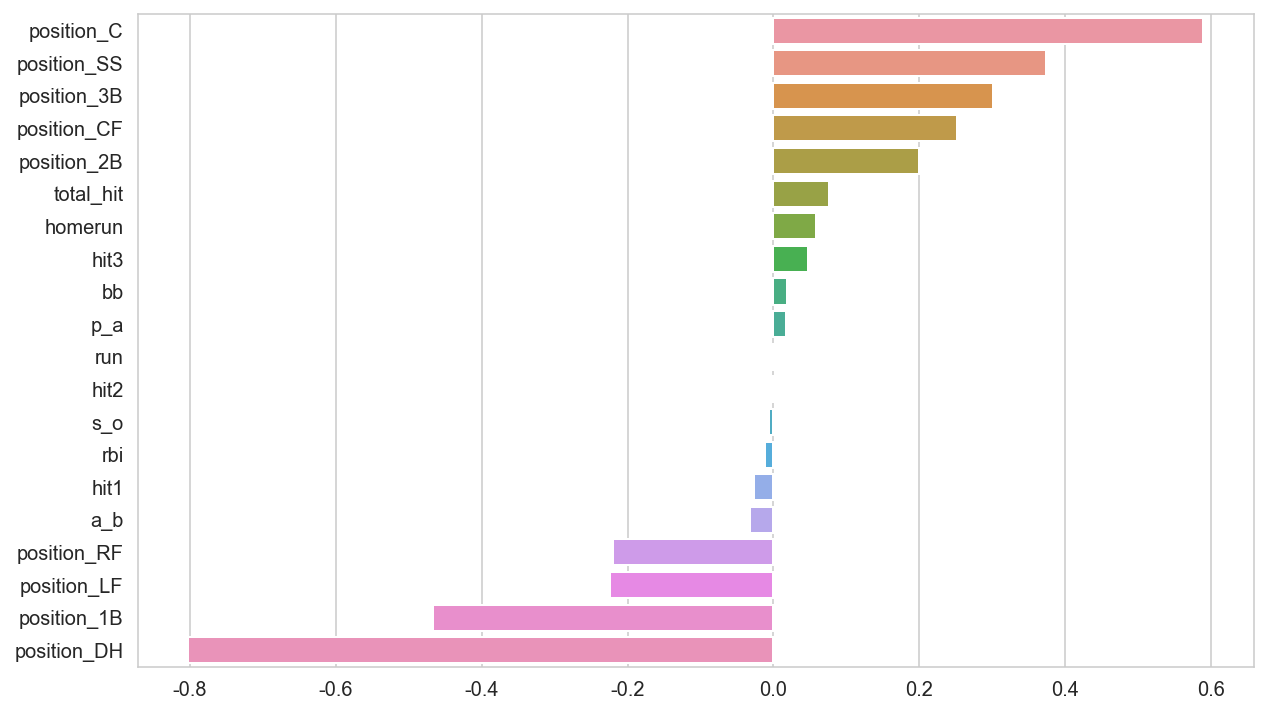

In [12]:
# 회귀계수 시각화

coef = pd.Series(ridge_reg.coef_, index=X_train.columns)  # 원핫인코딩 했으면 그거 써주고, 아니라면 X_df나 X_features 등
coef_sort = coef.sort_values(ascending=False) #[:10] top10만 보려면 sort_values 뒤에 붙이면 된다

plt.figure(figsize=(10,6))
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 피쳐엔지니어링 - 로그변환

In [63]:
y_df['war_log'] = np.log1p(y_df['war'])

In [64]:
y_train = y_df.loc[X_df['year'] < 2019].iloc[:, -1]
y_test = y_df.loc[X_df['year'] == 2019].iloc[:, -1]

In [65]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

print('알스퀘어드(Variance score) : {0:.3f}'.format(r2_score(y_test_exp, pred_exp)))
print('MAE : {0:.3f}'.format(mean_absolute_error(y_test_exp, pred_exp)))

알스퀘어드(Variance score) : 0.779
MAE : 0.477


#### 로그변환 전 성적

알스퀘어드(Variance score) : 0.811

MAE : 0.433


따라서 로그변환은 기각한다.

In [13]:
# 로그 변환 전 데이터셋 다시

X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)


X_train = X_df.loc[X_df['year'] < 2019].iloc[:, 1:]
X_test = X_df.loc[X_df['year'] == 2019].iloc[:, 1:]

y_train = y_df.loc[X_df['year'] < 2019].iloc[:, -1]
y_test = y_df.loc[X_df['year'] == 2019].iloc[:, -1]



ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

print('알스퀘어드(Variance score) : {0:.3f}'.format(r2_score(y_test, pred)))

알스퀘어드(Variance score) : 0.811


## 릿지 예측을 가지고 실제값과 예측값 비교 시각화

In [13]:
pred_war_2019 = pd.Series(pred)
real_war_2019 = y_test
name_2019 = df_war.loc[df_war['year'] == 2019, 'player_name']

show_data = pd.DataFrame(dict(name_2019 = name_2019, real_war_2019 = real_war_2019, pred_war_2019 = pred_war_2019))
show_data = show_data.set_index('name_2019')

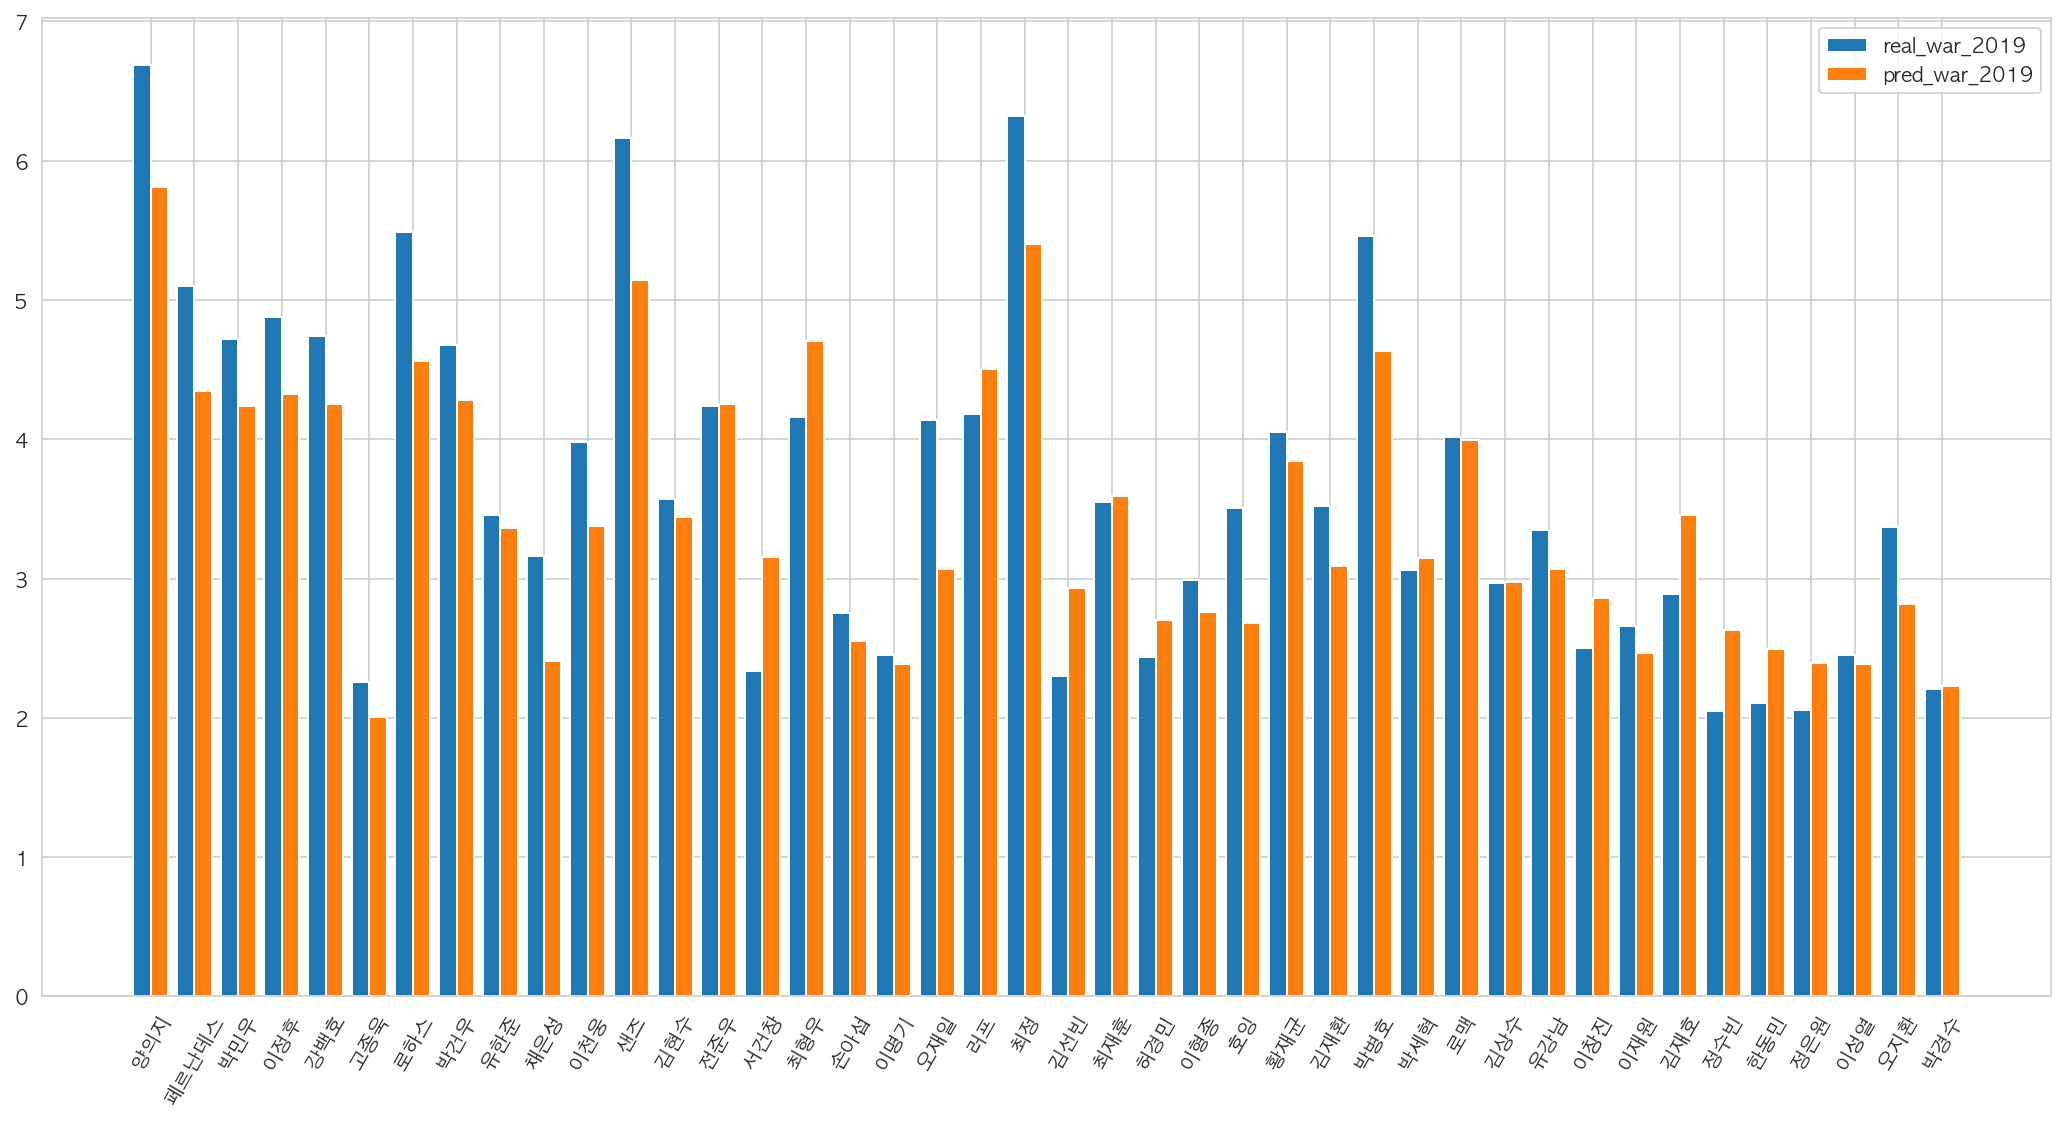

In [14]:

set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

plt.figure(figsize=(18,9))

topics = show_data.index
value_a = show_data['real_war_2019']
value_b = show_data['pred_war_2019']

#t = 2 # Number of dataset
#w = 0.8 # Width of each bar
#n = 1  # This is our first dataset (out of 2)
#d = 6 # Number of sets of bars #len(show_data['real_war_2019'])


def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, len(show_data['real_war_2019']))
value_b_x = create_x(2, 0.8, 2, len(show_data['pred_war_2019']))


ax = plt.subplot()
ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

# x값을 그래프 사이에 넣어야 예쁘겠죠?
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)


plt.xticks(rotation=60)

plt.legend(["real_war_2019", "pred_war_2019"])


plt.show()


## 릿지에 알파값을 줘본다 - (실패)

MAE : 0.433


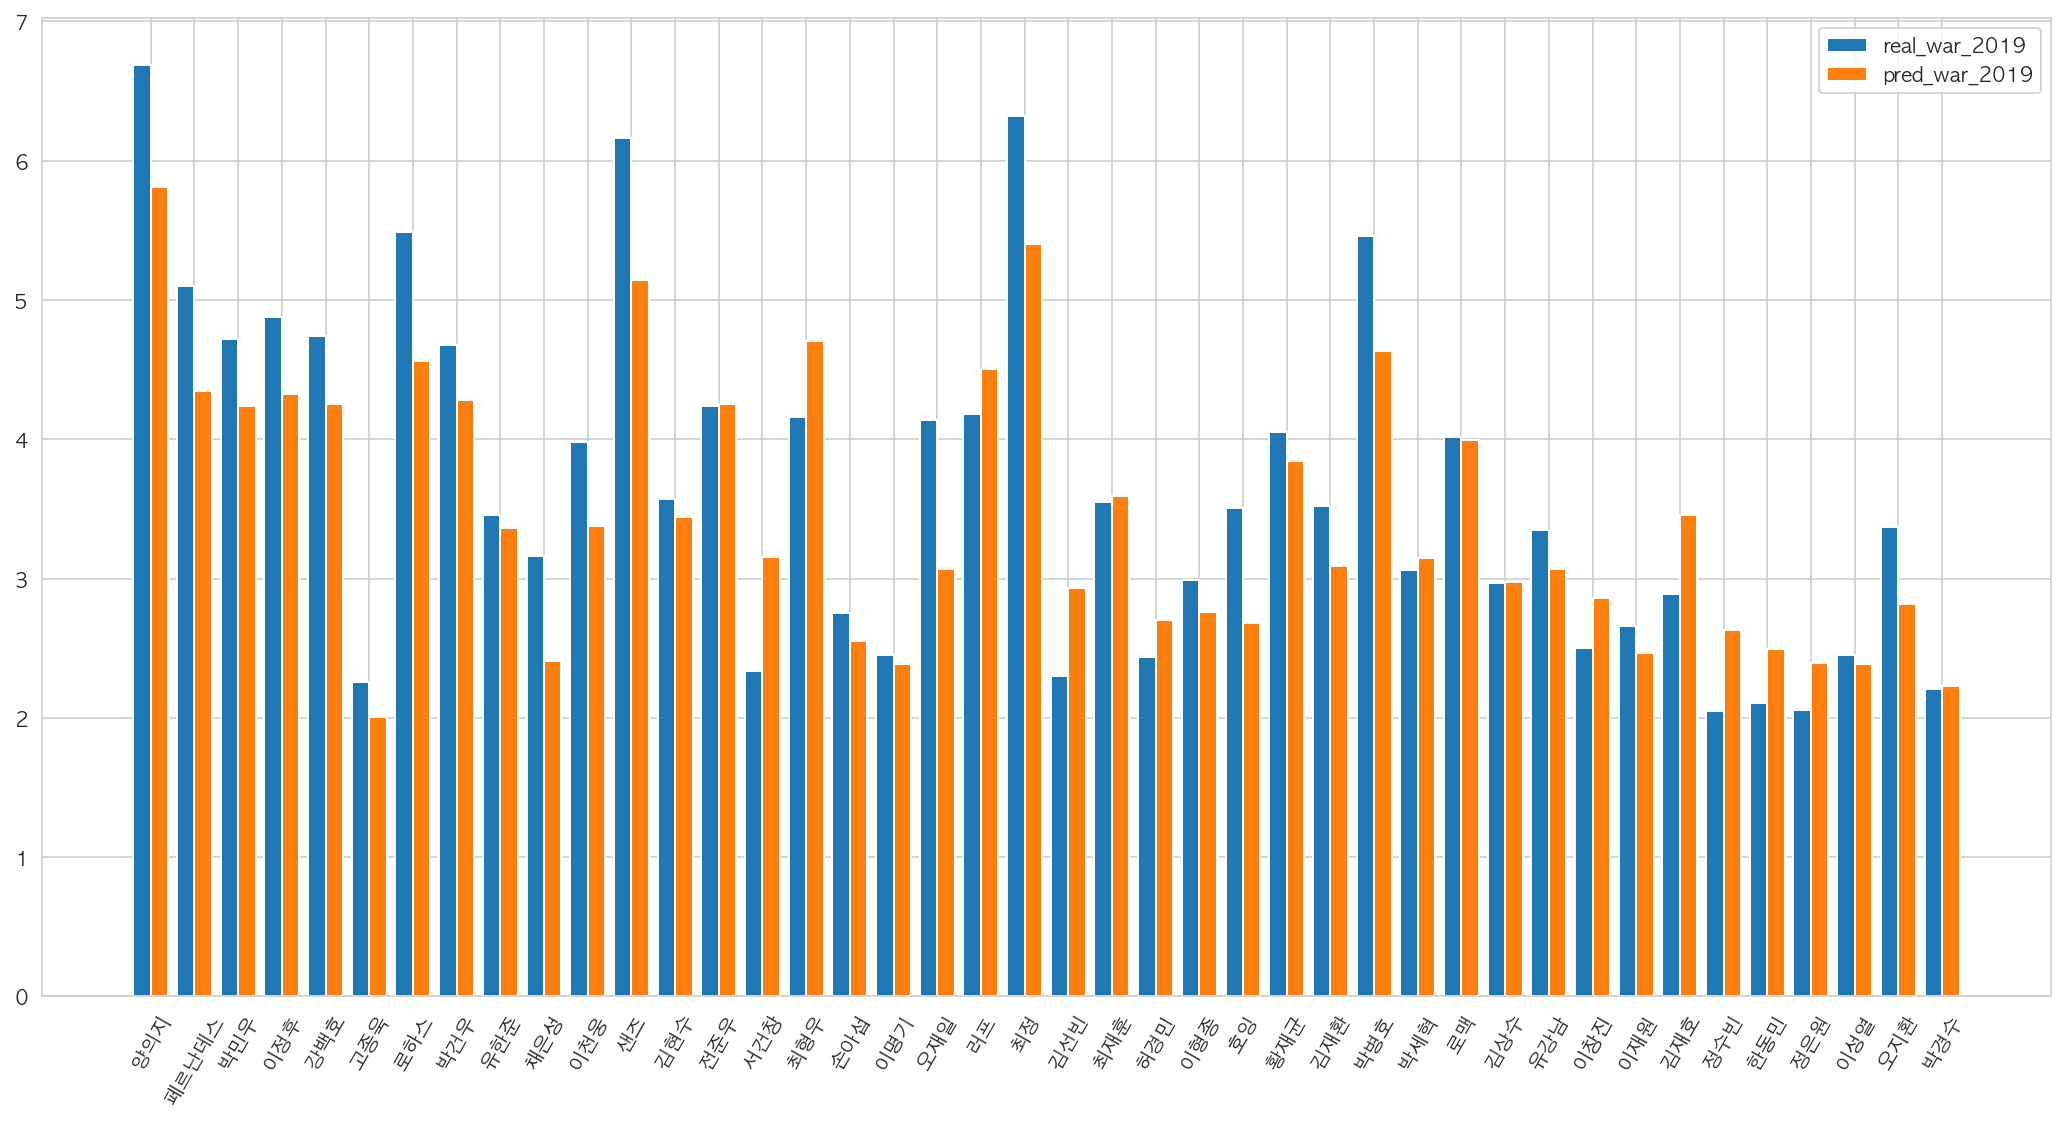

In [71]:
ridge = Ridge(alpha = 100)

ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)


print('MAE : {0:.3f}'.format(mean_absolute_error(y_test, pred)))

pred_war_2019 = pd.Series(pred)
real_war_2019 = y_test
name_2019 = df_war.loc[df_war['year'] == 2019, 'player_name']

show_data = pd.DataFrame(dict(name_2019 = name_2019, real_war_2019 = real_war_2019, pred_war_2019 = pred_war_2019))
show_data = show_data.set_index('name_2019')


set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

plt.figure(figsize=(18,9))

topics = show_data.index
value_a = show_data['real_war_2019']
value_b = show_data['pred_war_2019']

#t = 2 # Number of dataset
#w = 0.8 # Width of each bar
#n = 1  # This is our first dataset (out of 2)
#d = 6 # Number of sets of bars #len(show_data['real_war_2019'])


def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, len(show_data['real_war_2019']))
value_b_x = create_x(2, 0.8, 2, len(show_data['pred_war_2019']))


ax = plt.subplot()
ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

# x값을 그래프 사이에 넣어야 예쁘겠죠?
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)


plt.xticks(rotation=60)

plt.legend(["real_war_2019", "pred_war_2019"])


plt.show()


## 타겟값을 조금 유연하게 만들어 GridSearchCV를 해보자

In [31]:
X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)

from sklearn.model_selection import cross_val_score




ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

print('알스퀘어드(Variance score) : {0:.3f}'.format(r2_score(y_test, pred)))

# model 을 넣으면 됨
cross_val_score(ridge_reg, X_df, y_df, scoring="r2", cv = 3)


알스퀘어드(Variance score) : 0.811


array([0.14390779, 0.57760209, 0.68004178])

## 파라미터 조정 -

그래프를 보니 유독 홈런 타자들에게 real_WAR 이 후한 것 같다.

홈런에 대한 가중치를 줘야한다

방법이 무엇이 있을까?

-> X_test 용 데이터 셋의 홈런 량을 임의로 조절해본다

조절방식은 다음과 같을 수 있다.

- 그냥 홈런 다 2배로 끌어오릴기
- 홈런 상위권 타자들의 홈런만 임의적으로 높여주기 - 고종욱이나 박경수, 이명기 등은 잘 맞추고 있기 때문에

In [37]:
X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)


X_train = X_df.loc[X_df['year'] < 2019].iloc[:, 1:]
X_test = X_df.loc[X_df['year'] == 2019].iloc[:, 1:]

y_train = y_df.loc[X_df['year'] < 2019].iloc[:, -1]
y_test = y_df.loc[X_df['year'] == 2019].iloc[:, -1]

In [38]:
X_test['homerun'] = X_test['homerun']*1.5

MAE : 0.376


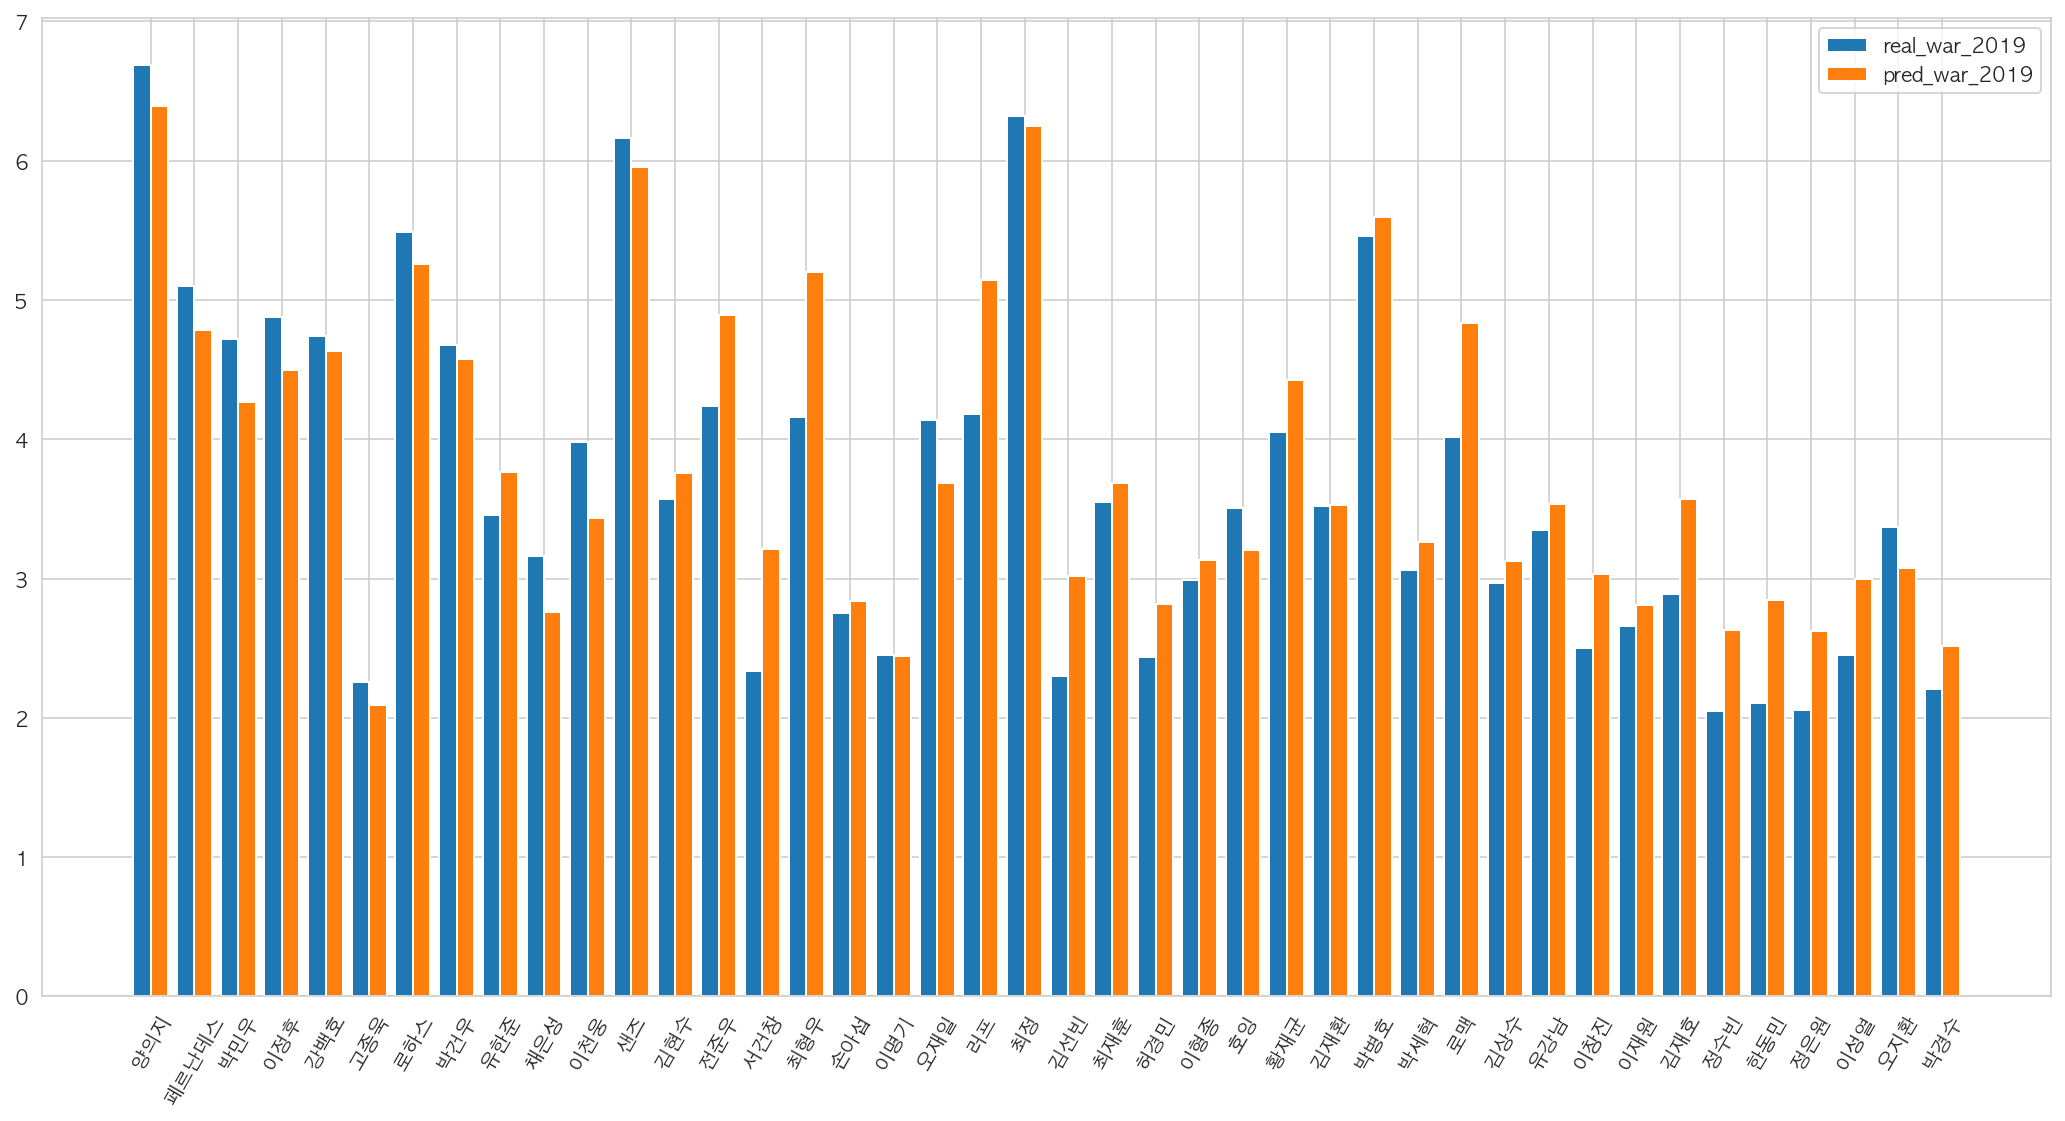

In [39]:
ridge = Ridge(alpha = 100)

ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)


print('MAE : {0:.3f}'.format(mean_absolute_error(y_test, pred)))

pred_war_2019 = pd.Series(pred)
real_war_2019 = y_test
name_2019 = df_war.loc[df_war['year'] == 2019, 'player_name']

show_data = pd.DataFrame(dict(name_2019 = name_2019, real_war_2019 = real_war_2019, pred_war_2019 = pred_war_2019))
show_data = show_data.set_index('name_2019')


set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

plt.figure(figsize=(18,9))

topics = show_data.index
value_a = show_data['real_war_2019']
value_b = show_data['pred_war_2019']

#t = 2 # Number of dataset
#w = 0.8 # Width of each bar
#n = 1  # This is our first dataset (out of 2)
#d = 6 # Number of sets of bars #len(show_data['real_war_2019'])


def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, len(show_data['real_war_2019']))
value_b_x = create_x(2, 0.8, 2, len(show_data['pred_war_2019']))


ax = plt.subplot()
ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

# x값을 그래프 사이에 넣어야 예쁘겠죠?
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)


plt.xticks(rotation=60)

plt.legend(["real_war_2019", "pred_war_2019"])


plt.show()


In [70]:
# 홈런 상위권 타자만 홈런 더 늘려주기 (2019년 홈런 평균값의 1.5배 보다도 잘치는 선수들의 홈런만 1.5배로 조절)

X_df = df_war_ohe.drop(['player_name', 'team'], axis=1).iloc[:, :-1]
y_df = pd.merge(df_war_ohe.iloc[:, 0], df_war_ohe.iloc[:, -1], left_on=None, right_on=None, left_index=True, right_index=True)


X_train = X_df.loc[X_df['year'] < 2019].iloc[:, 1:]
X_test = X_df.loc[X_df['year'] == 2019].iloc[:, 1:]

y_train = y_df.loc[X_df['year'] < 2019].iloc[:, -1]
y_test = y_df.loc[X_df['year'] == 2019].iloc[:, -1]

In [66]:
X_test.loc[X_test['homerun'] >= X_test['homerun'].mean()*1.5, 'homerun'] = X_test.loc[X_test['homerun'] >= X_test['homerun'].mean()*1.5, 'homerun']*1.5




MAE : 0.397


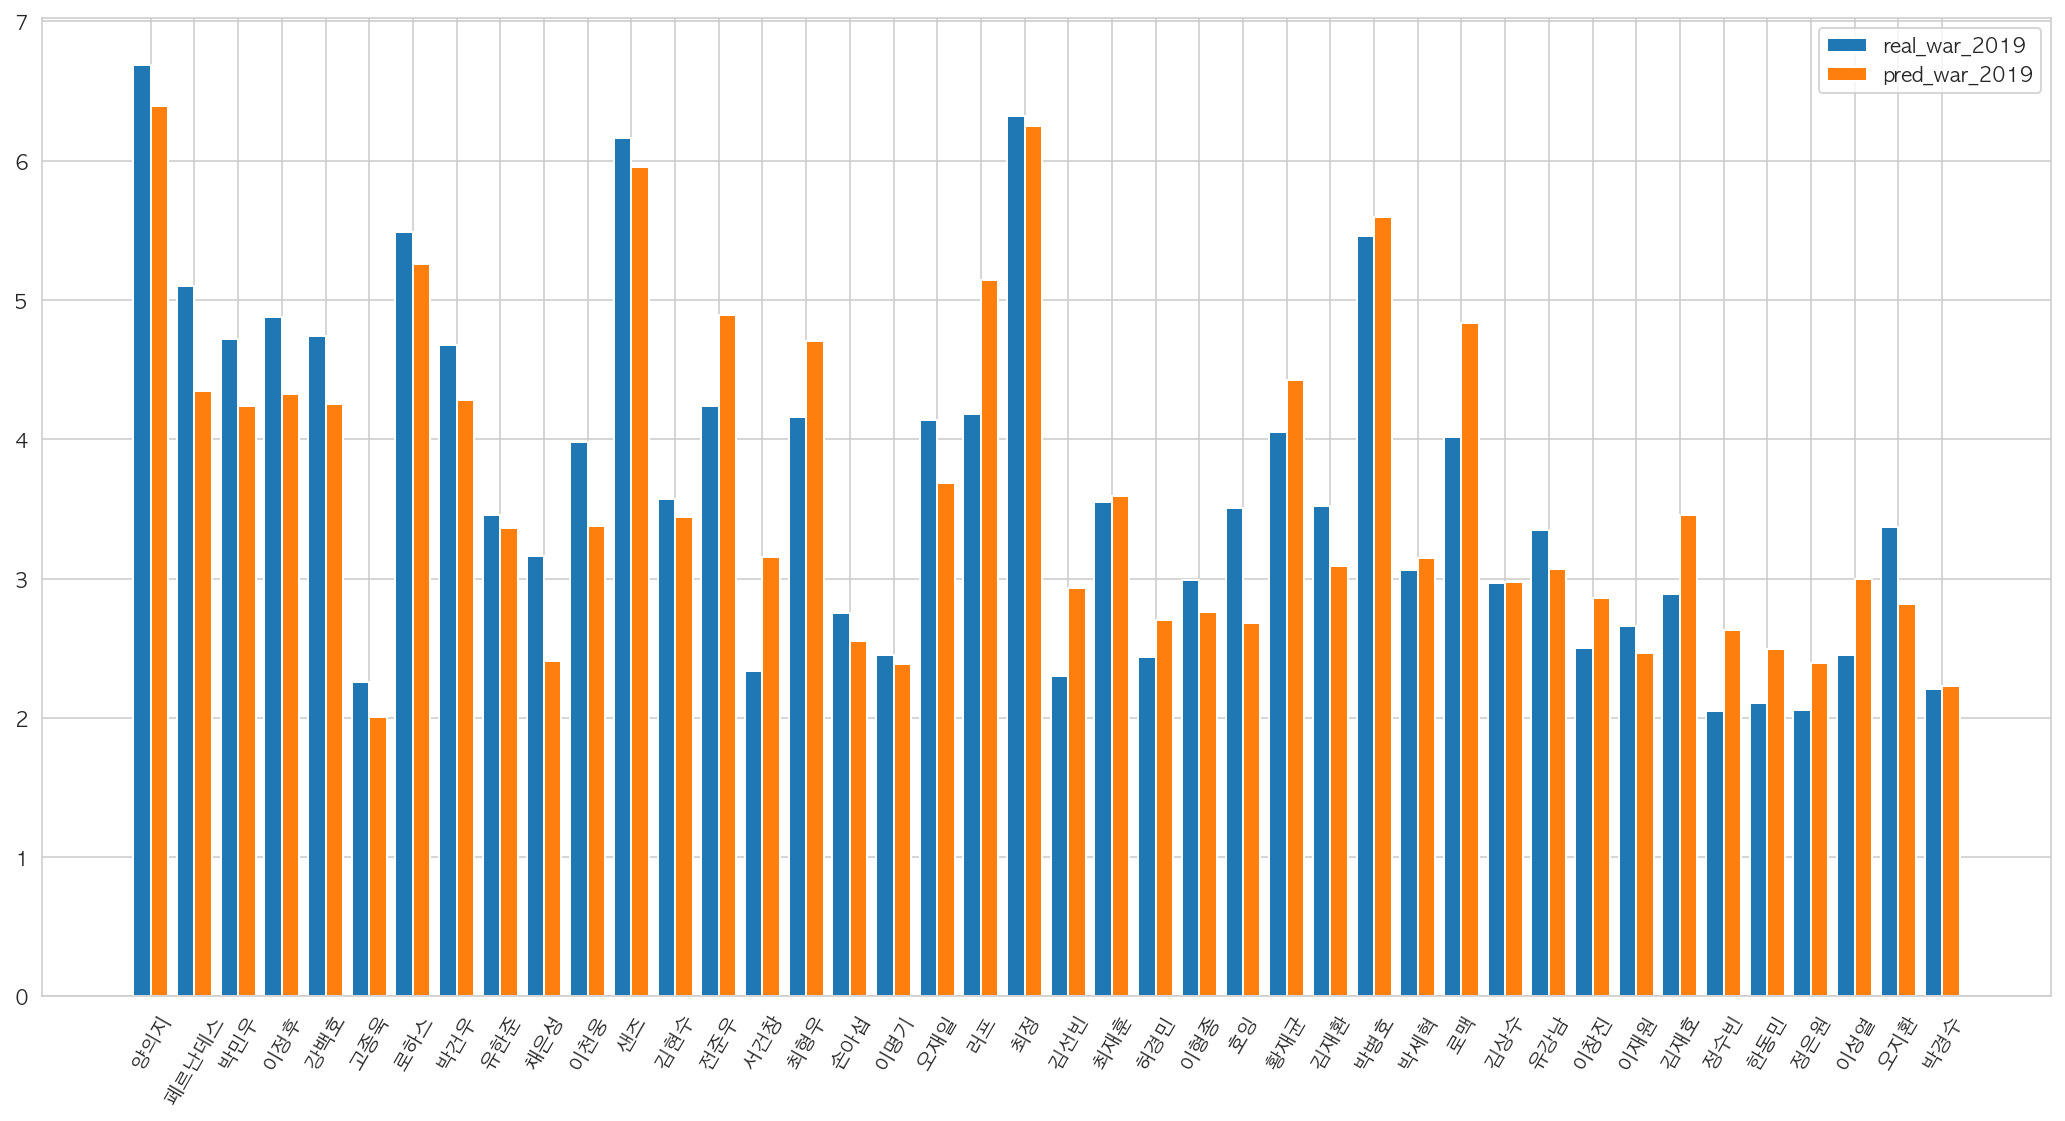

In [68]:
ridge = Ridge(alpha = 100)

ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)


print('MAE : {0:.3f}'.format(mean_absolute_error(y_test, pred)))

pred_war_2019 = pd.Series(pred)
real_war_2019 = y_test
name_2019 = df_war.loc[df_war['year'] == 2019, 'player_name']

show_data = pd.DataFrame(dict(name_2019 = name_2019, real_war_2019 = real_war_2019, pred_war_2019 = pred_war_2019))
show_data = show_data.set_index('name_2019')


set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

plt.figure(figsize=(18,9))

topics = show_data.index
value_a = show_data['real_war_2019']
value_b = show_data['pred_war_2019']

#t = 2 # Number of dataset
#w = 0.8 # Width of each bar
#n = 1  # This is our first dataset (out of 2)
#d = 6 # Number of sets of bars #len(show_data['real_war_2019'])


def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, len(show_data['real_war_2019']))
value_b_x = create_x(2, 0.8, 2, len(show_data['pred_war_2019']))


ax = plt.subplot()
ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

# x값을 그래프 사이에 넣어야 예쁘겠죠?
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)


plt.xticks(rotation=60)

plt.legend(["real_war_2019", "pred_war_2019"])


plt.show()


In [96]:
from pyecharts.charts import Bar
from pyecharts import options as opts


bar = Bar()
bar.add_xaxis(show_data.head().index.tolist())
bar.add_yaxis("실제 WAR", show_data.head()['real_war_2019'].tolist())
bar.add_yaxis("예측 WAR", show_data.head()['pred_war_2019'].tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title="KBO 2019 WAR"))
bar.render_notebook()

In [95]:
show_data.head()

,real_war_2019,pred_war_2019
name_2019,,
양의지,6.69,5.812577
페르난데스,5.10,4.346749
박민우,4.72,4.238572
이정후,4.88,4.324266
강백호,4.74,4.255446


In [127]:
from pyecharts.charts import Line, Bar

line.add_xaxis(show_data.head().index.tolist())
line.add_yaxis("실제 WAR", show_data.head()['real_war_2019'].tolist())
line.add_yaxis("예측 WAR", show_data.head()['pred_war_2019'].tolist())
line.set_global_opts(title_opts=opts.TitleOpts(title="KBO 2019 WAR"))
line.render_notebook()
